In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import numpy as np
import os

%load_ext autoreload
%autoreload 2

os.chdir('drive/MyDrive/DL202010821/CNN')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization, ReLU, Add, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


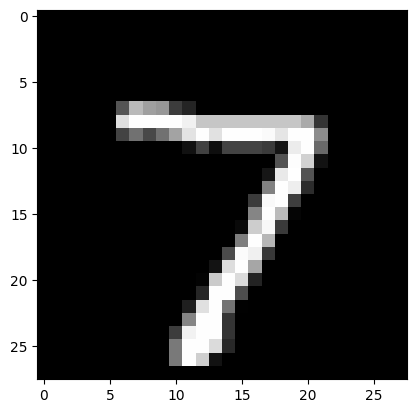

In [ ]:
plt.imshow(x_test[0], cmap = 'gray')
plt.show()

In [ ]:
model = Sequential([
    # C1: Convolutional Layer
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1), padding='same'),
    # S2: Subsampling Layer (Average Pooling)
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),

    # C3: Convolutional Layer
    Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'),
    # S4: Subsampling Layer (Average Pooling)
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),

    # C5: Convolutional Layer
    Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'),
    Flatten(),

    # F6: Fully Connected Layer
    Dense(84, activation='relu'),

    # Output Layer
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split = 0.1)
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.3f}')

Epoch 1/10
422/422 [==============================] - 7s 6ms/step - loss: 0.3862 - accuracy: 0.8844 - val_loss: 0.1066 - val_accuracy: 0.9698
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.1040 - accuracy: 0.9684 - val_loss: 0.0863 - val_accuracy: 0.9753
Epoch 3/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0788 - accuracy: 0.9753 - val_loss: 0.0650 - val_accuracy: 0.9793
Epoch 4/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0617 - accuracy: 0.9802 - val_loss: 0.0587 - val_accuracy: 0.9835
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0537 - accuracy: 0.9831 - val_loss: 0.0552 - val_accuracy: 0.9852
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0439 - accuracy: 0.9863 - val_loss: 0.0493 - val_accuracy: 0.9858
Epoch 7/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0385 - accuracy: 0.9877 - val_loss: 0.0442 - val_accuracy: 0.9868
Epoch 

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.array(y_pred)

313/313 [==============================] - 1s 2ms/step


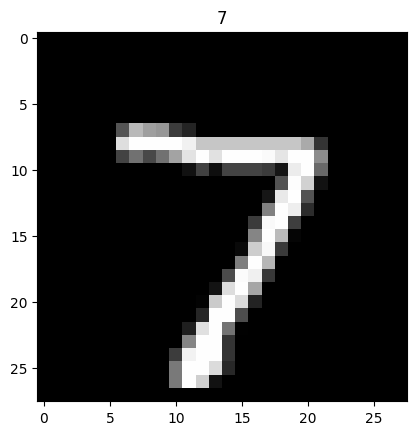

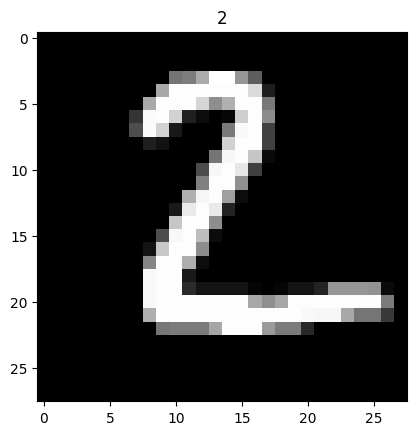

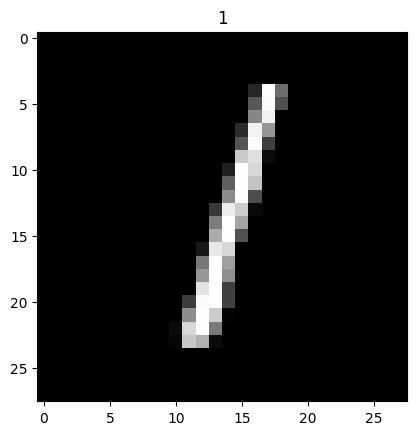

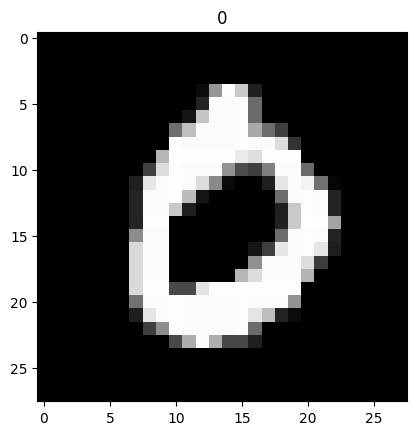

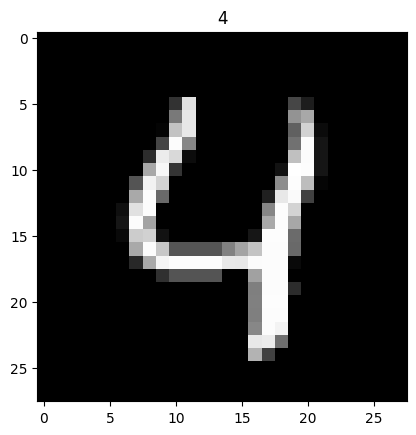

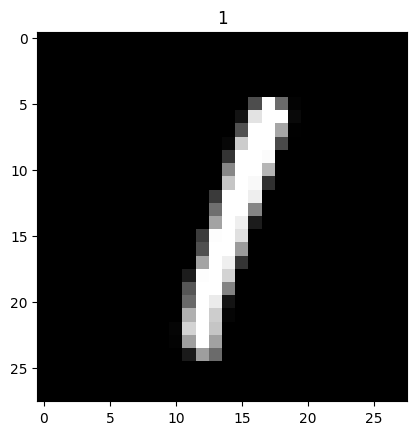

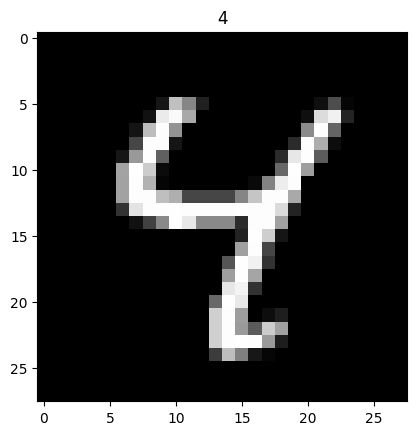

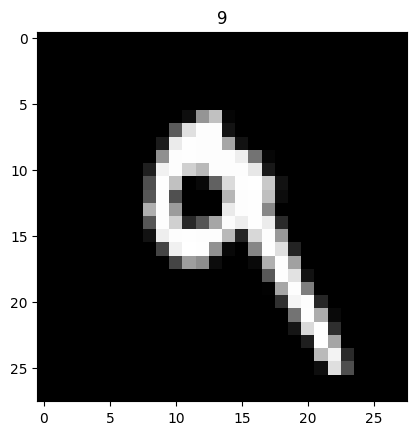

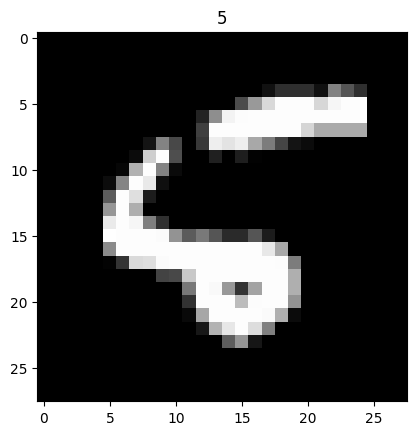

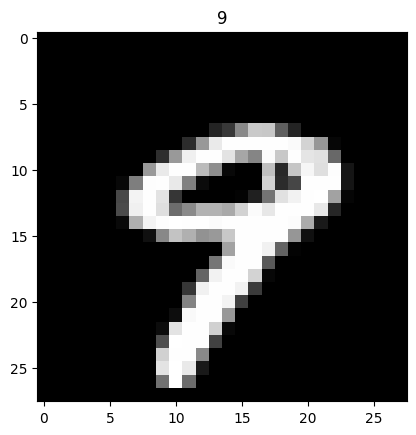

In [ ]:
for idx in range(10):
  plt.title(str(np.argmax(y_pred[idx])))
  plt.imshow(x_test[idx], cmap = 'gray')
  plt.show()

In [ ]:
#틀린 결과 확인하기
for idx in range(len(y_pred)):
  if np.argmax(y_pred[idx]) != np.argmax(y_test[idx]):
    plt.title("Ground Truth: {}. Predicted: {}" .format(str(np.argmax(y_test[idx])), str (np.argmax(y_pred[idx]))))
    plt.imshow(x_test[idx], cmap='gray')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from custom_conv2d import MyConv2D

In [ ]:
#직접 Conv2d 만들기
model_custom = Sequential([
    #C1: Convolutional Layer
    MyConv2D(6, kernel_size=(5,5), strides=(1,1), activation='relu', input_shape=(28,28,1), padding='SAME'),
    #S2: Subsampling Layer (Average Pooling)
    AveragePooling2D(pool_size=(2,2), strides=(2,2)),

    #C3: Convolutional Layer
    MyConv2D(6, kernel_size=(5,5), strides=(1,1), activation='relu', padding='VALID'),
    #S4: Subsampling Layer (Average Pooling)
    AveragePooling2D(pool_size=(2,2), strides=(2,2)),

    #C5: Convolutional Layer
    MyConv2D(20, kernel_size=(5,5), strides=(1,1), activation='relu', padding='VALID'),
    Flatten(),

    #F6: Fully Connected Layer
    Dense(84, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

#모델 컴파일
model_custom.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#모델 학습
model_custom.fit(x_train, y_train, batch_size = 128, epochs=10, validation_split=0.1)
#모델 평가
test_loss, test_accuracy = model_custom.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy: .3f}')

Epoch 1/10
422/422 [==============================] - 4s 6ms/step - loss: 0.5829 - accuracy: 0.8161 - val_loss: 0.2097 - val_accuracy: 0.9378
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.2060 - accuracy: 0.9371 - val_loss: 0.1243 - val_accuracy: 0.9660
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.1430 - accuracy: 0.9557 - val_loss: 0.1013 - val_accuracy: 0.9713
Epoch 4/10
422/422 [==============================] - 2s 5ms/step - loss: 0.1137 - accuracy: 0.9652 - val_loss: 0.0964 - val_accuracy: 0.9707
Epoch 5/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0986 - accuracy: 0.9693 - val_loss: 0.0793 - val_accuracy: 0.9772
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0870 - accuracy: 0.9732 - val_loss: 0.0713 - val_accuracy: 0.9788
Epoch 7/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0782 - accuracy: 0.9751 - val_loss: 0.0771 - val_accuracy: 0.9777
Epoch 

In [ ]:
# 직접 ResNet34 만들기
def residual_block(x, filters, stride=1):
    shortcut = x

    # 첫 번째 컨볼루션
    x = Conv2D(filters, 3, padding='same', strides=stride)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # 두 번째 컨볼루션
    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)

    # shortcut 연결
    if stride != 1 or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, 1, strides=stride)(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

def build_resnet34(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # 초기 컨볼루션 레이어
    x = Conv2D(64, 7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(3, strides=2, padding='same')(x)

    # Residual 블록
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)
    x = residual_block(x, 128)
    x = residual_block(x, 128)
    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 512, stride=2)
    x = residual_block(x, 512)
    x = residual_block(x, 512)

    # 평균 풀링 및 밀집층
    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)

    # 모델 구성
    model = Model(inputs=inputs, outputs=x)
    return model

In [ ]:
# 직접 ResNet18 만들기
def residual_block(x, filters, stride=1):
    shortcut = x

    # 첫 번째 컨볼루션
    x = Conv2D(filters, 3, padding='same', strides=stride)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # 두 번째 컨볼루션
    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)

    # shortcut 연결
    if stride != 1 or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, 1, strides=stride)(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

def build_resnet18(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # 초기 컨볼루션 레이어
    x = Conv2D(64, 7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(3, strides=2, padding='same')(x)

    # Residual 블록
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)
    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)
    x = residual_block(x, 512, stride=2)
    x = residual_block(x, 512)

    # 평균 풀링 및 밀집층
    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)

    # 모델 구성
    model = Model(inputs=inputs, outputs=x)
    return model

In [ ]:
from tensorflow.keras.datasets import cifar10
# 데이터셋 로드 및 전처리

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32')/ 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 생성
model = build_resnet18((32,32,3), 10)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# 모델 요약
model.summary()
# 모델 학습
model.fit(x_train, y_train, batch_size = 64, epochs = 10, validation_data = (x_test, y_test))

#모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy:  {test_accuracy: .3f}')

170498071/170498071 [==============================] - 6s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 16, 16, 64)           9472      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 16, 16, 64)           256       ['conv2d_3[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 re_lu (ReLU)              

In [ ]:
from tensorflow.keras.datasets import cifar10
# 데이터셋 로드 및 전처리

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32')/ 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 생성
model = build_resnet34((32,32,3), 10)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# 모델 요약
model.summary()
# 모델 학습
model.fit(x_train, y_train, batch_size = 64, epochs = 10, validation_data = (x_test, y_test))

#모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy:  {test_accuracy: .3f}')

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_46 (Conv2D)          (None, 16, 16, 64)           9472      ['input_3[0][0]']             
                                                                                                  
 batch_normalization_40 (Ba  (None, 16, 16, 64)           256       ['conv2d_46[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 re_lu_34 (ReLU)             (None, 16, 16, 64)           0         ['batch_normalization_40

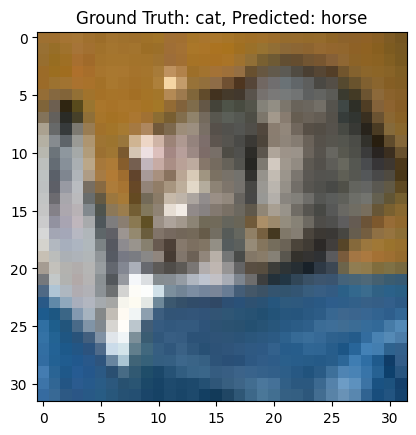

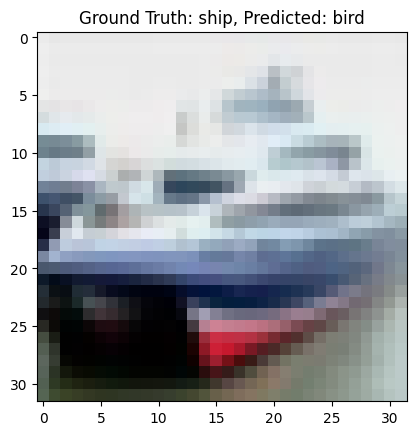

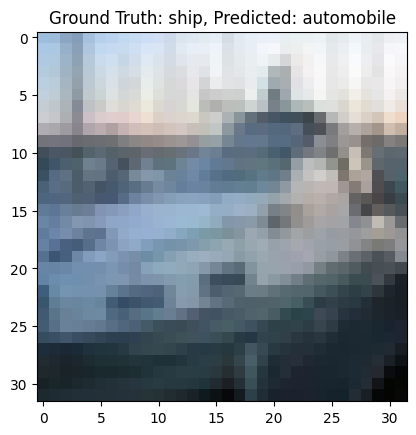

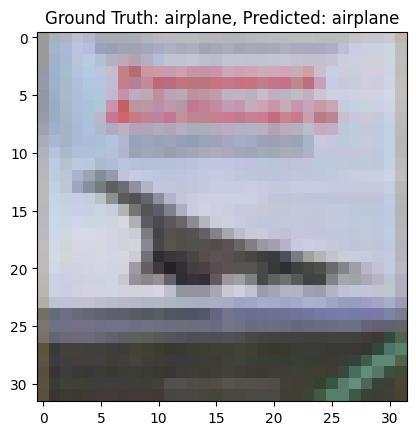

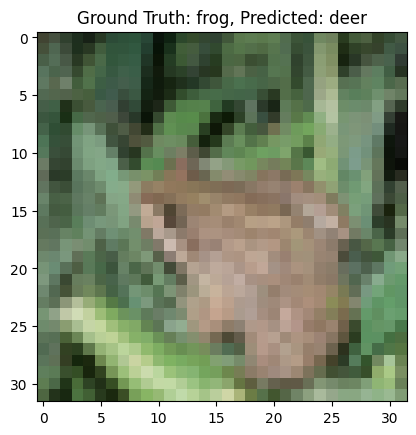

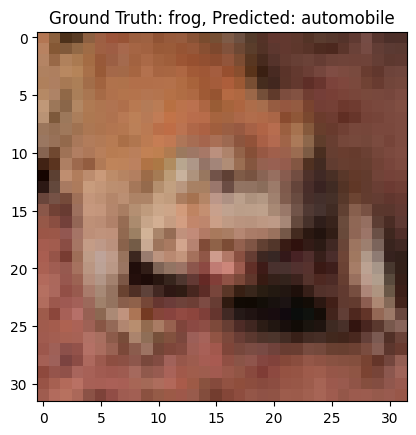

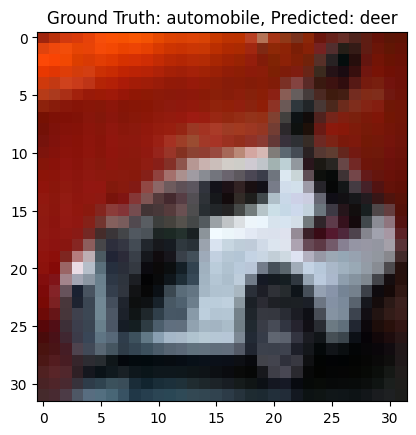

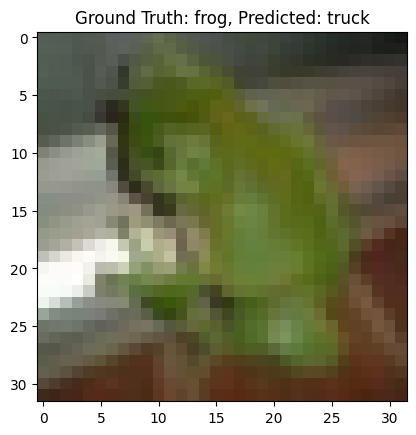

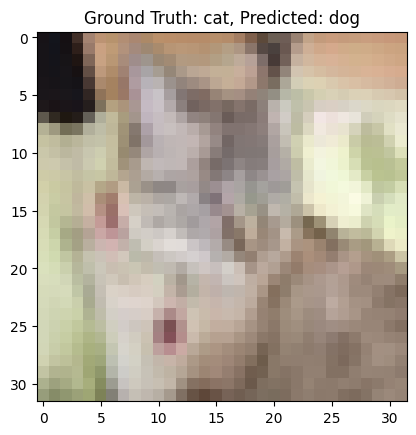

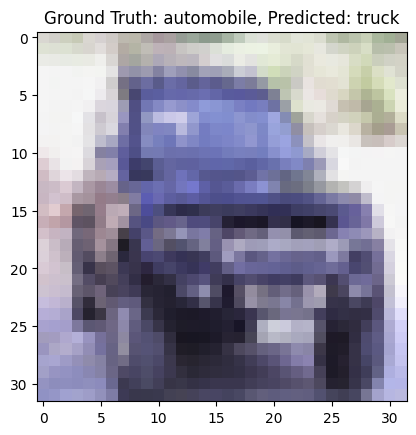

In [ ]:
cifar10 = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
for idx in range(len(y_pred[:10])):
  plt.title("Ground Truth: {}, Predicted: {}".format(cifar10[np.argmax(y_test[idx])], cifar10[np.argmax(y_pred[idx])]))
  plt.imshow(x_test[idx], cmap='gray')
  plt.show()